In [ ]:
# 0. Importing PyTorch and setting up device-agnostic code
# 1. Get data
# 2. Become one with the data (data preparation)
# 3. Transforming data
# 4. Loading data with ImageFolder (option 1)
# 5. Loading image data with a custom Dataset
# 6. Other forms of transforms (data augmentation)
# 7. Model 0: TinyVGG without data augmentation
# 8. Exploring loss curves
# 9. Model 1: TinyVGG with data augmentation
# 10. Compare model results
# 11. Making a prediction on a custom image
# https://www.learnpytorch.io/04_pytorch_custom_datasets/

In [2]:
import torch
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:
# Get Data - Downloading & Unzipping Image Data onto Path

import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

data\pizza_steak_sushi directory exists.


In [ ]:
# Data Structure
# pizza_steak_sushi
#    - train
#        - pizza
#        - steak
#        - sushi
#
#    - test
#        - pizza
#        - steak
#        - sushi

data\pizza_steak_sushi\test\pizza\648055.jpg


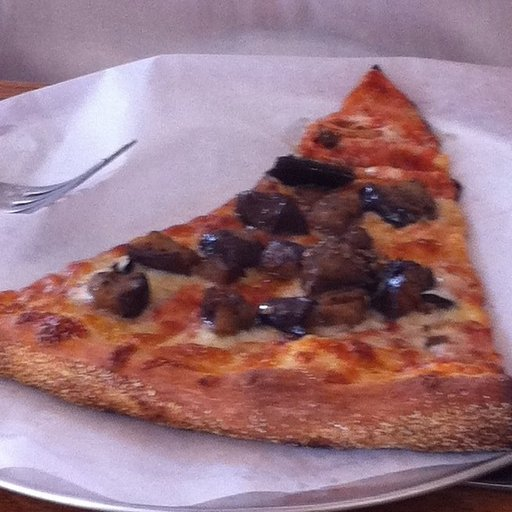

In [52]:
import random
from PIL import Image
from pathlib import Path
from IPython.display import Image

# 1. Get all image paths (* means "any combination")
# List of all image paths
image_path_list = list(Path("data/pizza_steak_sushi").rglob("*/*/*.[jJ][pP][gG]"))
image_path_list

image_path = image_path_list[21]
print(image_path)
Image(filename=image_path) 


In [ ]:
# 3. Transforming Data
#     - Turn it into Tensors
#     - Turn it into a torch.utils.data.Dataset
#     - Turn it into a torch.utils.data.DataLoader